In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd
import matplotlib as mpl
import datetime as dt
from pandas_datareader import data as pdr
import plotly.offline as plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
yf.pdr_override()
import os
plotly.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
import wrds
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# plt.style.use(['science', 'notebook'])

In [2]:
df_close_clean = pd.read_csv('data/df_close_clean.csv')
df_open_clean = pd.read_csv('data/df_open_clean.csv')
df_volume_clean = pd.read_csv('data/df_volume_clean.csv')
df_shares_outstanding_clean = pd.read_csv('data/df_shares_outstanding_clean.csv')
df_volume_clean_wrds = pd.read_csv('data/df_volume_clean_WRDS.csv')

# change index to datetime
df_close_clean.index = pd.to_datetime(df_close_clean['Date'])
df_open_clean.index = pd.to_datetime(df_open_clean['Date'])
df_volume_clean.index = pd.to_datetime(df_volume_clean['Date'])
df_shares_outstanding_clean.index = pd.to_datetime(df_shares_outstanding_clean['Date'])
df_volume_clean_wrds.index = pd.to_datetime(df_volume_clean_wrds['Date'])

# Remove the "Date" column as it no longer has any use
df_close_clean = df_close_clean.drop(columns=['Date'])
df_open_clean = df_open_clean.drop(columns=['Date'])
df_volume_clean = df_volume_clean.drop(columns=['Date'])
df_shares_outstanding_clean = df_shares_outstanding_clean.drop(columns=['Date'])
df_volume_clean_wrds = df_volume_clean_wrds.drop(columns=['Date'])

# testing if the index is datetime and the "Date" column is removed
assert 'Date' not in df_close_clean.columns
assert 'Date' not in df_open_clean.columns
assert 'Date' not in df_volume_clean.columns
assert 'Date' not in df_shares_outstanding_clean.columns
assert 'Date' not in df_volume_clean_wrds.columns
assert df_close_clean.index.dtype == 'datetime64[ns]'
assert df_open_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean.index.dtype == 'datetime64[ns]'
assert df_shares_outstanding_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean_wrds.index.dtype == 'datetime64[ns]'

In [3]:
flat_vol = np.sort(df_volume_clean.values.flatten())
np.count_nonzero(flat_vol == 2)

0

In [4]:
volume_flat = df_volume_clean.values.flatten()
volume_flat = volume_flat[np.where(volume_flat != 0)]
vol_mean = np.mean(volume_flat)
print(vol_mean)
vol_sum = np.sum(volume_flat)
normalized_vol = volume_flat/vol_mean
sorted_vol = np.sort(normalized_vol)
print(sorted_vol[0:50])
print(sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

5364467.902905552
[1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05]
[108.63250756 109.01006597 109.22022661 109.48903239 110.34399137
 110.67386566 110.79078312 111.51376256 112.06069472 112.44433016
 113.00229789 113.53468993 113.57592422 114.94532378 118.02818312
 118.52195064 119.01

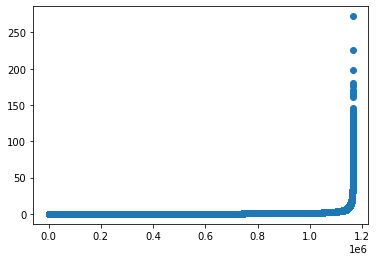

No handles with labels found to put in legend.


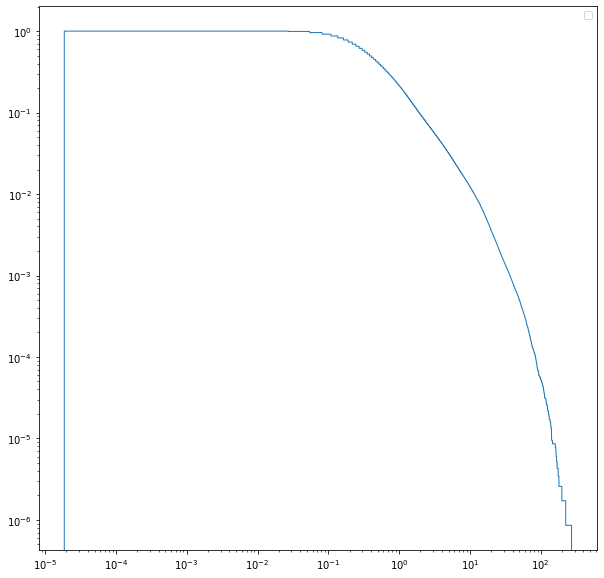

In [5]:
x = np.arange(0, len(sorted_vol), 1)
plt.scatter(x, sorted_vol)
plt.show()
# non-log plot
plt.figure(figsize=(10,10))
plt.hist(sorted_vol, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
plt.gca().set_xscale("log")
plt.legend()
plt.show()

In [6]:
vol_mean = np.mean(df_volume_clean.values.flatten())
df_vol_sum = df_volume_clean.sum().sum()
df_normalized_vol = df_volume_clean/vol_mean
sorted_vol = np.sort(df_normalized_vol.values.flatten())
sorted_vol = sorted_vol[np.where(sorted_vol != 0)]
print('start', sorted_vol[0:50])
print('end', sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

start [1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05]
end [108.74780037 109.12575949 109.33614318 109.60523425 110.4611006
 110.79132498 110.90836654 111.63211328 112.1796259  112.5636685
 113.12222841 113.65518548 113.69646353 115.06731645 118.15344766
 118.64773922 119.13785073 119

### Velocity calculation

We do the velocity calculation on the real data a fashion similar as Feng et. al's 2012 paper, in the following steps:
1. Divide the total number of shares traded on the market(volume) by the number of outstanding shares of each stock every day
2. Resample the dataframe into a yearly timeframe
3. Sum up the yearly velocity per stock and divide it by the amount of years used in the dataframe which results in the mean velocity per stock
4. Take the mean of all the mean of the different stocks

In [7]:
# Step 1
velocity_df_daily = df_volume_clean_wrds/df_shares_outstanding_clean

# Step 2
velocity_yearly_df = velocity_df_daily.resample('Y').sum()

# Step 3 + 4
sum_velocity_yearly_df = velocity_yearly_df.apply(lambda x: x.sum())/velocity_yearly_df.shape[0] # .shape[0] = amount of rows 
V = sum_velocity_yearly_df.mean()

In [8]:
def probability_of_trading(V_f:float, V:float) -> float:
    """returns the probability of trading for a given velocity of fundamental traders and total market velocity V"""
    # V is total market velocity, V_f is the velocity of fundamental traders, V_c is the velocity of technical traders
    # We assume that the proportion of shares held by fundamental traders is the same as in the period 1997-2006, namely 83% on average. 
    # This might be a bit strong, but we continue with this assumption for now.
    # thus the velocity of technical traders is V_C is given by:
    V_c = (V - 0.83*V_f)/(1-0.83)
    # because there are around 250 trading days in a year, we arrive at probability of trading p as follows:
    p = V_c/(250*2)
    return p


In [9]:
# multiple choices of V_F, in the paper they chose V_f = 0.4 as an arbirtrary choice which achieved best fit
V_f_list = [0.2, 0.4, 0.6, 0.8]

print("The V value is", V)
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    print('V_f: ' + str(V_f), 'gives a p value of', p)


The V value is 2.183549851113631
V_f: 0.2 gives a p value of 0.02373588060133683
V_f: 0.4 gives a p value of 0.02178293942486624
V_f: 0.6 gives a p value of 0.019829998248395653
V_f: 0.8 gives a p value of 0.01787705707192506


# Model parameters

In [27]:
# other parameters
n = 2**10
t = 10000
p = 0.02178
omega = 1
b = 1.5
size = 1
k = 1
M = 500
d = 1.12

# Model definition: ABM

In [28]:
# agent behaviors for buying, selling and holding based on the probability of trading p
def buy_sell_hold(p, amount_times):
    assert p <= 0.5, "p should be smaller than 0.5"
    psis = np.zeros(amount_times)
    dice_rolls = np.random.uniform(0, 1, amount_times)
    indices = np.nonzero(dice_rolls <= 2*p)
    for index in indices[0]:
        if np.random.randint(0,2) == 0:
            psis[index] = 1
        else:
            psis[index] = -1
    return psis

In [41]:
class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int, t: int) -> None:
        self.n = n
        self.p = p
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0

        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:

        # number of opinion groups
        if sum(self.daily_return) != 0:
            self.c = (self.n // abs(sum(self.daily_return))) ** self.omega
        else:
            self.c = self.n
                
        return self.c

    def step(self):
        self.count += 1
        c = int(self.distribute_opinion_groups())
        psis = buy_sell_hold(self.p, c) 
        daily_return = psis * (n/c)
        trading_volume = np.sum(np.abs(daily_return))
        self.daily_returns.append(np.sum(daily_return * k))
        self.daily_trading_volumes.append(trading_volume)
        return self.count

In [63]:
# ABM simulation

model_test = Model(p, n, size, k, omega, t)
def stepper(t):
    for i in range(t):
        model_test.step()
%prun stepper(t)

In [ ]:
#          776269 function calls in 1.174 seconds

#    Ordered by: internal time

#    ncalls  tottime  percall  cumtime  percall filename:lineno(function)
#    446265    0.733    0.000    0.733    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
#     10000    0.179    0.000    1.025    0.000 3703988537.py:2(buy_sell_hold)
#     10000    0.076    0.000    0.076    0.000 {method 'uniform' of 'numpy.random.mtrand.RandomState' objects}
#     10000    0.051    0.000    1.171    0.000 847086491.py:25(step)
#     20000    0.032    0.000    0.032    0.000 {method 'reduce' of 'numpy.ufunc' objects}
#     20000    0.016    0.000    0.055    0.000 fromnumeric.py:70(_wrapreduction)
#     20000    0.015    0.000    0.071    0.000 fromnumeric.py:2111(sum)
#     10000    0.012    0.000    0.012    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
#     30000    0.010    0.000    0.101    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
#     10000    0.008    0.000    0.008    0.000 {built-in method numpy.zeros}
#     20000    0.008    0.000    0.088    0.000 <__array_function__ internals>:2(sum)
#     20000    0.005    0.000    0.005    0.000 fromnumeric.py:71(<dictcomp>)
#     10000    0.004    0.000    0.028    0.000 <__array_function__ internals>:2(nonzero)
#     10000    0.004    0.000    0.017    0.000 fromnumeric.py:52(_wrapfunc)
#         1    0.004    0.004    1.174    1.174 1149585652.py:4(stepper)
#     10000    0.003    0.000    0.005    0.000 847086491.py:15(distribute_opinion_groups)
#     10000    0.003    0.000    0.020    0.000 fromnumeric.py:1827(nonzero)
#     20000    0.002    0.000    0.002    0.000 {built-in method builtins.isinstance}
#     20000    0.002    0.000    0.002    0.000 fromnumeric.py:2106(_sum_dispatcher)
#     20000    0.002    0.000    0.002    0.000 {method 'append' of 'list' objects}
#     10000    0.002    0.000    0.002    0.000 {built-in method builtins.sum}
#     20000    0.002    0.000    0.002    0.000 {method 'items' of 'dict' objects}
#     10000    0.001    0.000    0.001    0.000 {built-in method builtins.getattr}
#     10000    0.001    0.000    0.001    0.000 fromnumeric.py:1823(_nonzero_dispatcher)
#         1    0.000    0.000    1.174    1.174 {built-in method builtins.exec}
#         1    0.000    0.000    1.174    1.174 <string>:1(<module>)
#         1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

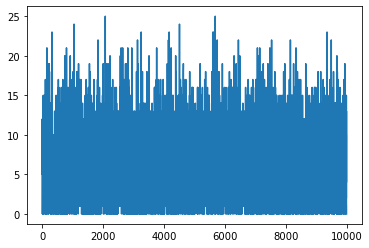

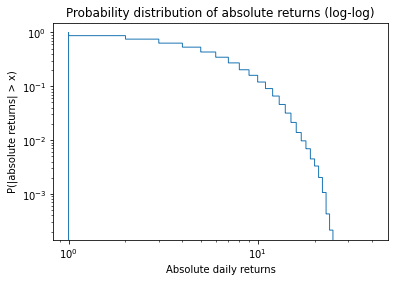

In [62]:
# logarithmic bins
bin=np.logspace(start=0, stop=np.log(5), num=t)

# normalised returns
returns = [abs(day) for day in model_test.daily_returns]
plt.plot(np.abs(model_test.daily_returns))
plt.show()

plt.figure(1)
plt.hist(returns, bin, cumulative=-1, density=True, log=True, histtype='step')
plt.title("Probability distribution of absolute returns (log-log)")
plt.xlabel("Absolute daily returns")
plt.ylabel("P(|absolute returns| > x)")
plt.gca().set_xscale("log")
plt.show()